In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime, timedelta
import os

[*********************100%***********************]  1 of 1 completed
Data collected for CARL-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for CHR.CO
[*********************100%***********************]  1 of 1 completed
Data collected for COLO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DANSKE.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DSV.CO
[*********************100%***********************]  1 of 1 completed
Data collected for MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NDA-DK.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NOVO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for GN.CO
[*********************100%***********************]  1 of 1 completed
Data collected for ORSTED.CO
[*********************100%**

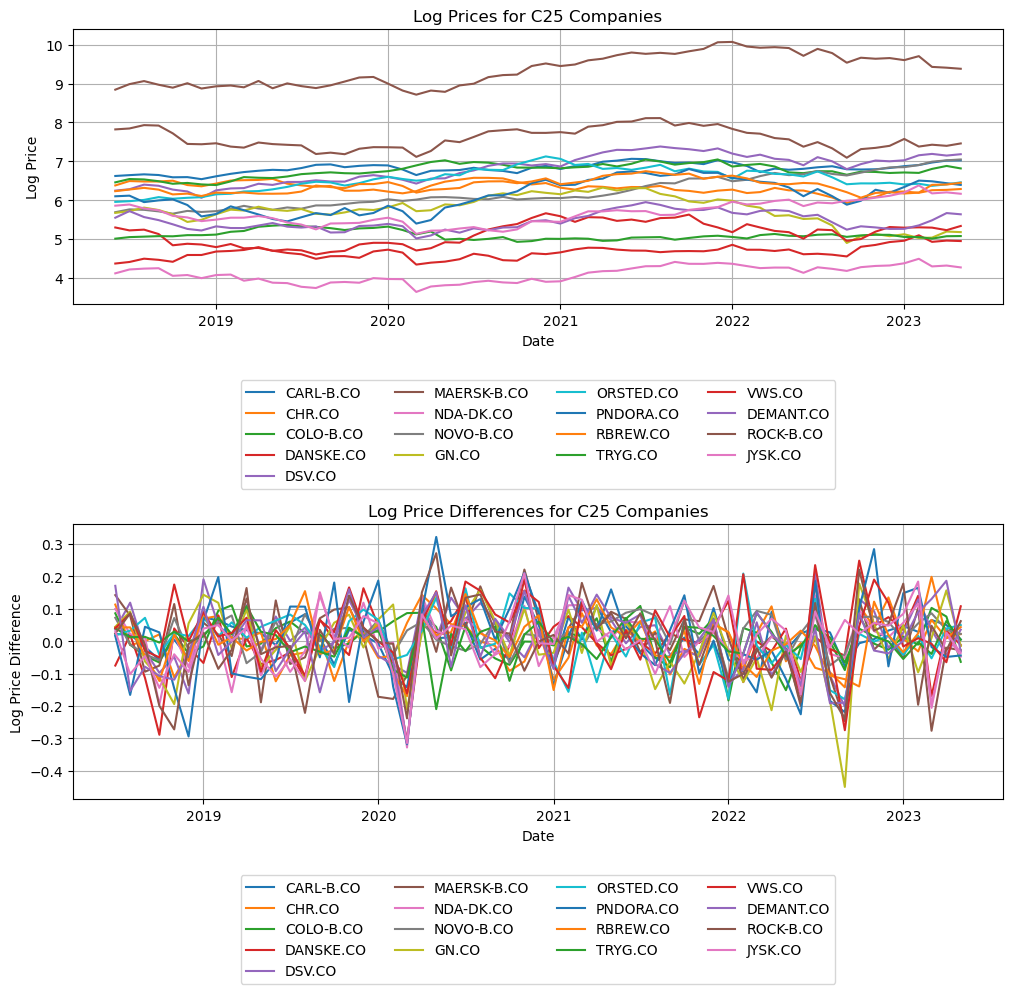

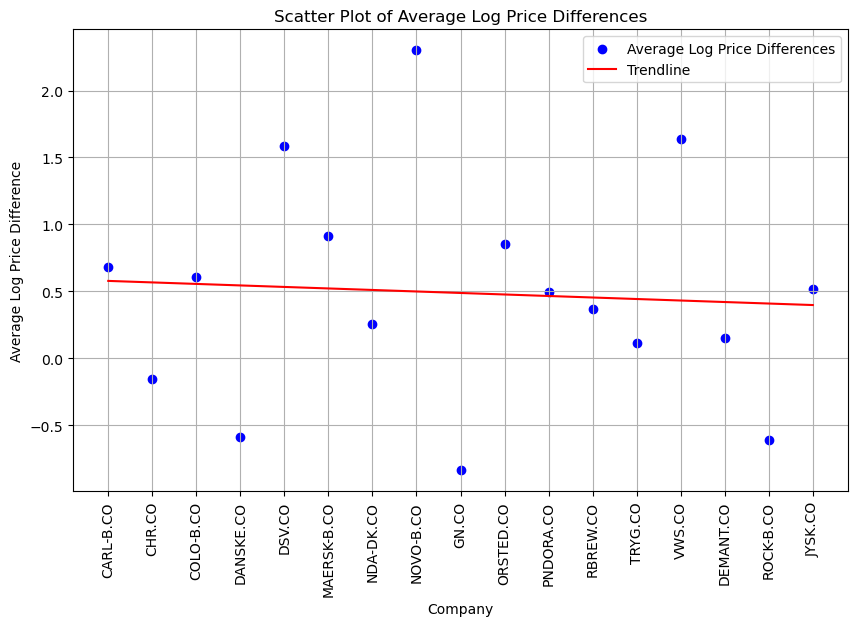

Slope of the trendline: -0.011274843864814865


In [11]:
import numpy as np
import os
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import linregress
from matplotlib.widgets import CheckButtons


# Define the list of company symbols in the Danish C25 index
c25_companies = [
    'CARL-B.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO',
]

# Set the start and end dates for the data collection
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5 * 365)).strftime('%Y-%m-%d')

# Create a directory to store the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Collect stock data for each company
data_collection = {}

for symbol in c25_companies:
    print(f"Collecting data for {symbol}...")
    try:
        # Retrieve the stock data
        data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')

        # Save the data to a CSV file
        filename = f"{output_dir}/{symbol}.csv"
        data.to_csv(filename)

        # Store the data for later use
        data_collection[symbol] = data

        print(f"Data collected for {symbol}")
    except Exception as e:
        print(f"Error collecting data for {symbol}: {e}")
print("Data collection complete.")

# Calculate average log price differences for each company
avg_log_diff_prices = {}

for symbol, data in data_collection.items():
    log_diff = data['Close'].apply(np.log).diff()
    avg_log_diff_prices[symbol] = log_diff.mean() * 100

# Print average log price differences for each company
for symbol, avg_diff in avg_log_diff_prices.items():
    print(f"Average log price difference for {symbol}: {avg_diff}")

# Create subplots for log prices and log price differences with more distance
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.8)

# Plot log prices for all companies
axs[0].set_title("Log Prices for C25 Companies")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Log Price")

for symbol, data in data_collection.items():
    data['Log_Price'] = np.log(data['Close'])
    axs[0].plot(data.index, data['Log_Price'], label=symbol)

axs[0].grid(True)

# Move the legend box to the lower center of the plot, below the date axis
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Plot log price differences for all companies
axs[1].set_title("Log Price Differences for C25 Companies")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Log Price Difference")

for symbol, data in data_collection.items():
    data['Log_Price_Diff'] = data['Log_Price'].diff()
    axs[1].plot(data.index, data['Log_Price_Diff'], label=symbol)

axs[1].grid(True)

# Move the legend box to the lower center of the plot, below the date axis
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Display the scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot of Average Log Price Differences")
plt.xlabel("Company")
plt.ylabel("Average Log Price Difference")

x = np.arange(len(c25_companies))
y = list(avg_log_diff_prices.values())

plt.scatter(x, y, color='blue', label="Average Log Price Differences")

# Add trendline
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x
plt.plot(x, trendline, color='red', label="Trendline")

plt.xticks(x, c25_companies, rotation='vertical')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
print("Slope of the trendline:", slope)


In [44]:
import pandas as pd

# Read the ESG scores data from the CSV file
esg_scores_data = pd.read_csv("Companies ESG scores2.csv")

# Create a DataFrame to store the average log price differences
avg_log_diff_df = pd.DataFrame(list(avg_log_diff_prices.items()), columns=['symbol', 'Average Log Price Difference'])

# Merge the ESG scores data with the average log price differences based on the "Companies" column
merged_data = pd.merge(esg_scores_data, avg_log_diff_df, left_on='Companies', right_on='symbol')

# Display the merged data
print(merged_data)


FileNotFoundError: [Errno 2] No such file or directory: 'Companies ESG scores2.csv'